<a href="https://colab.research.google.com/github/lailanajjar/datasciencefundamental/blob/main/Prediction_of_product_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of product sales

- author: Laila Najjar

## project overview
This  project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.


## Load and Inspect Data

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_sales.shape

(8523, 12)

- the Data Frame cosists of 8523  rows and 12 features (columns)

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- we have 7 categorical columns and 8 numeric columns:(1 is integer type and the rest are floats ) .Only one column has a wrong data type

In [ ]:
df_sales = df_sales.astype({'Outlet_Establishment_Year':'object'})
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


- all datatypes suits the features now

## Clean Data
- after loading the data we need to clean it and prepare it for the modeling phase . the cleaning process will depend on the answers to these questions :    
 - How many rows and columns?

 - What are the datatypes of each variable?

 - Are there duplicates? If so, drop any duplicates.

 - Identify missing values.

   - Decide on how to address the missing values and do it! (This requires your
   judgement, so explain your choice).

   - Confirm that there are no missing values after addressing them.

 - Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

 - For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
df_sales.duplicated().sum()

0

No duplicates to handle

In [ ]:
# inspecting missing values :
s_missing = df_sales.isna().sum()
s_missing

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# adding a filter to view oly the columns with missing values :
s_missing[s_missing > 0]


,0
Item_Weight,1463
Outlet_Size,2410


both of Item_Weight and Outlet_Size columns  contain missing values

In [ ]:
# find the percentage of missing values for each column :
s_missing[s_missing > 0] / len(df_sales) * 100

,0
Item_Weight,17.165317
Outlet_Size,28.276428


since we have high percentage of missing values for both columns , dropping rows with null values will not be the choice

In [ ]:
missing_weight_filter = df_sales['Item_Weight'].isna()
df_sales[missing_weight_filter]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


`The code fills missing values in the Item_Weight column by grouping the data by Item_Identifier and replacing the missing values within each group with the average weight of that group. This ensures that missing weights are imputed using the mean of items with the same identifier.`

In [ ]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].groupby(df_sales["Item_Identifier"]).transform(lambda x: x.fillna(x.mean()))

In [ ]:
df_sales['Item_Weight'].isna().sum()

4

In [ ]:
# # Group by 'Item_Type' and compute the median Item_Weight
# item_weight_median = df_sales.groupby('Item_Type')['Item_Weight'].median()
# item_weight_median

In [ ]:
# # Fill missing Item_Weight values using the median of the corresponding Item_Type
# df_sales['Item_Weight'] = df_sales.apply(
#     lambda row: item_weight_median[row['Item_Type']] if pd.isnull(row['Item_Weight']) else row['Item_Weight'],
#     axis=1
# )

`fill the rest missing item weights with a placeholder value (-1)`

In [ ]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [ ]:
df_sales['Item_Weight'].isna().sum()

0

In [ ]:
df_sales['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df_sales['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
df_sales.groupby('Outlet_Size')['Outlet_Identifier'].value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: count, dtype: int64

`filling the missing Outlet_Size values with the first available size within each Outlet_Identifier group ,considering that the outlet sizes are consistent `

In [ ]:
### handling the missing values of Outlet_Size column
def find_Outlet_Size(group):
    rows = group.dropna()
    v = rows.iloc[0] if rows.shape[0] > 0 else np.nan
    return group.fillna(v)

df_sales['Outlet_Size'] = df_sales['Outlet_Size'].groupby(df_sales['Outlet_Identifier']).transform(find_Outlet_Size)

print(df_sales['Outlet_Size'].isna().sum())

2410


<ipython-input-150-ee153d0a58bf>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return group.fillna(v)


`the method fails`

`Impute Missing Outlet_Size Using Mode: For each Outlet_Identifier, calculate the mode (most frequent value) of Outlet_Size and use it to fill missing values.`

In [ ]:
def fill_with_mode(group):
    mode_value = group.mode()
    if not mode_value.empty:  # Check if mode is not empty
        return group.fillna(mode_value[0])  # Fill missing values with the mode
    else:
        return group  # Return the original group if no mode exists

df_sales['Outlet_Size'] = df_sales.groupby('Outlet_Identifier')['Outlet_Size'].transform(fill_with_mode)

print(df_sales['Outlet_Size'].isna().sum())  # Check if there are still missing values


2410


`the second approach failed as well`

In [ ]:
# handling missing Outlets sizes using palce_holder_value
null_values_filter = df_sales['Outlet_Size'].isna()
null_values_df = df_sales[null_values_filter]
null_values_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
# Fill missing values in 'Outlet_Size' with the string 'missing'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('missing')

# Count the occurrences of each unique value in 'Outlet_Size'
outlet_size_counts = df_sales['Outlet_Size'].value_counts(dropna=False)

# Display the result
print(outlet_size_counts)


Outlet_Size
Medium     2793
missing    2410
Small      2388
High        932
Name: count, dtype: int64


In [ ]:
df_sales['Outlet_Size'].isna().sum()

0

**Mising values are handled**


In [ ]:
# fixing any incosistencies
cat_cols = df_sales.select_dtypes('object').columns
cat_cols




Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
for col in cat_cols:
  print(f"value counts for {col}:")
  print(df_sales[col].value_counts())
  print("\n")


value counts for Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


value counts for Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


value counts for Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


value counts for Outlet_Identifier:
Outlet_Identifier
OUT027    935
OU

In [ ]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
# numeric columns
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [ ]:
for col in num_cols:
  print(f"Descriptive statistics for  {col}:")
  print(df_sales[col].describe())
  print("\n \n \n ")

Descriptive statistics for  Item_Weight:
count    8523.000000
mean       12.868908
std         4.654721
min        -1.000000
25%         8.785000
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

 
 
 
Descriptive statistics for  Item_Visibility:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

 
 
 
Descriptive statistics for  Item_MRP:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

 
 
 
Descriptive statistics for  Item_Outlet_Sales:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, 

## Exploratory Data Analysis

### The goal of this is to help understanding the data as it relates to the products and outlets that play crucial roles in increasing sales.

 by creating exploratory visuals that might help  understand, explain, or model the data including :

 - Histograms to view the distributions of numerical features in the dataset.
 - Boxplots to view statistical summaries of numerical features in the dataset.
 - Countplots to view the frequency of each class of categorial features in your dataset.
 - Heatmap to view the correlation between features.

#### Categorical features exploratory visualizations:

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
df_sales[cat_cols].nunique()

,0
Item_Identifier,1559
Item_Fat_Content,2
Item_Type,16
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3
Outlet_Type,4


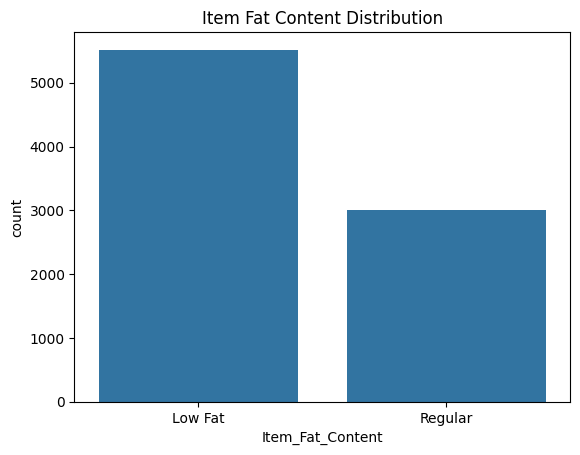

In [ ]:
ax = sns.countplot(data = df_sales , x = 'Item_Fat_Content')
ax.set_title('Item Fat Content Distribution');

`the count of low fat items are twice the regular items `

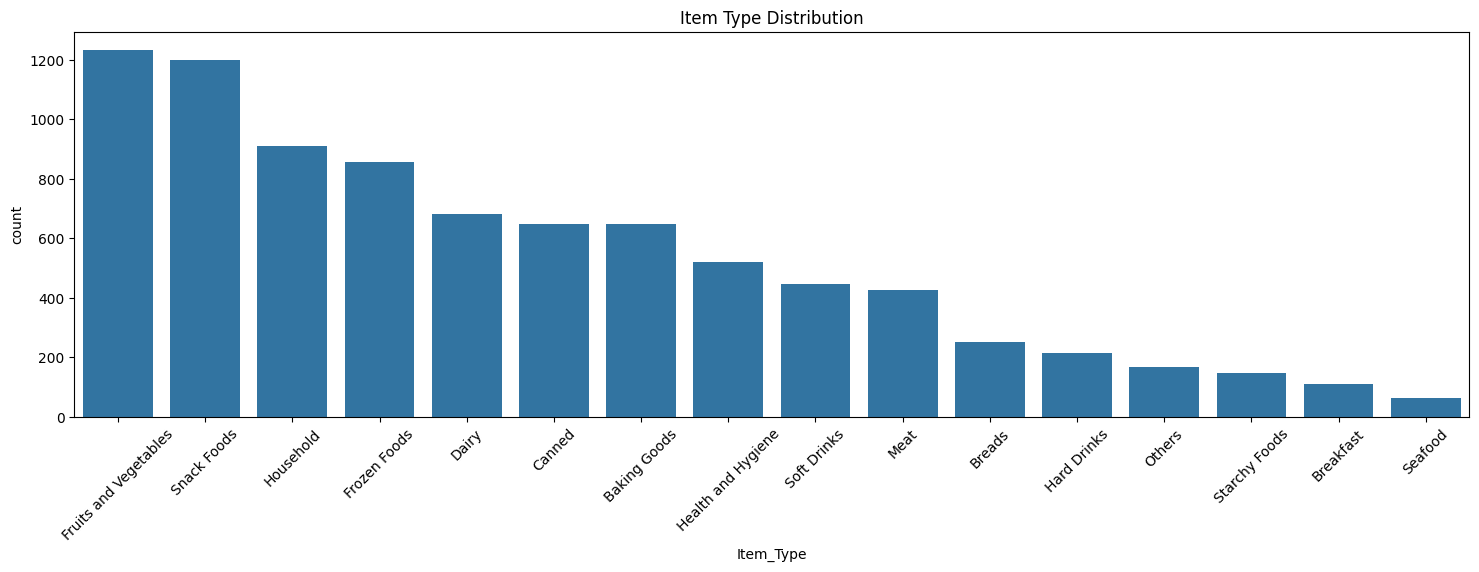

In [ ]:
fig , ax = plt.subplots(figsize = (18,5))
ax = sns.countplot(data = df_sales , x = 'Item_Type', order = df_sales['Item_Type'].value_counts().index )
ax.set_title('Item Type Distribution')
ax.tick_params(axis='x', labelrotation=45)



In [ ]:
item_type_order = df_sales['Item_Type'].value_counts().sort_values(ascending = False).index
item_type_order

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object', name='Item_Type')

`the figure shows the count of each Item_Type  ordered decending :
- -Fruits and Vegetables
- Snack Foods
- Household
- Frozen Foods
- Dairy
- Canned      
- Baking Goods
- Health and Hygiene
- Soft Drinks
- Meat
- Breads
- Hard Drinks
- Others
- Starchy Foods
- Breakfast
- Seafood

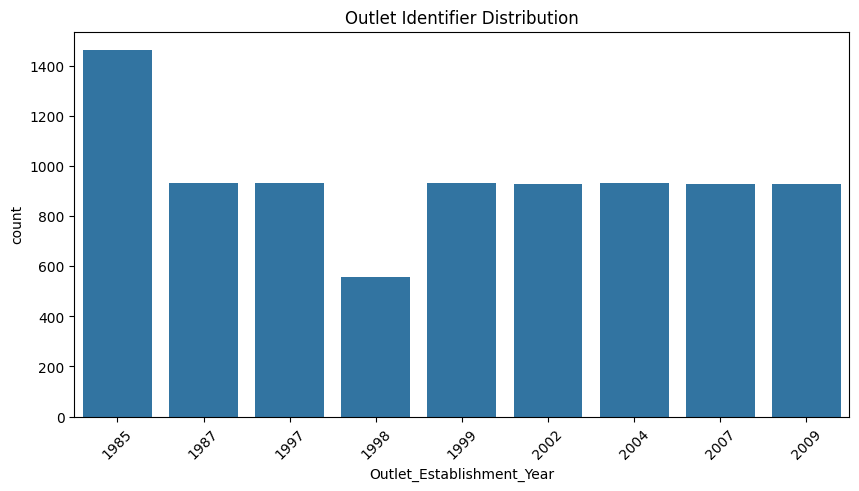

In [ ]:

fig , ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(data = df_sales , x = 'Outlet_Establishment_Year')
ax.set_title('Outlet Identifier Distribution')
ax.tick_params(axis='x', labelrotation=45)

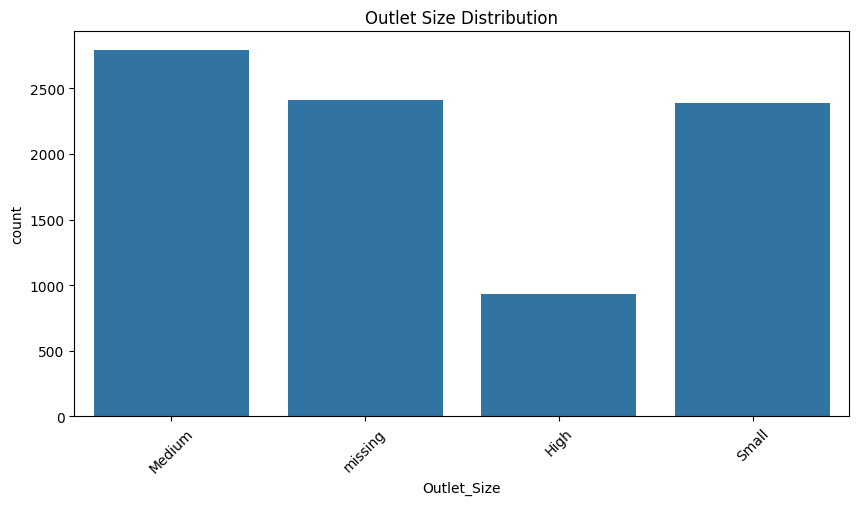

In [ ]:
fig , ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(data = df_sales , x = 'Outlet_Size')
ax.set_title('Outlet Size Distribution')
ax.tick_params(axis='x', labelrotation=45)

In [ ]:
size_filter = df_sales.groupby('Outlet_Size')['Outlet_Identifier'].value_counts()

`OUT013 is the only high-size outlet ,we have 3 medium size outlits , 3 small and the last three are missing`

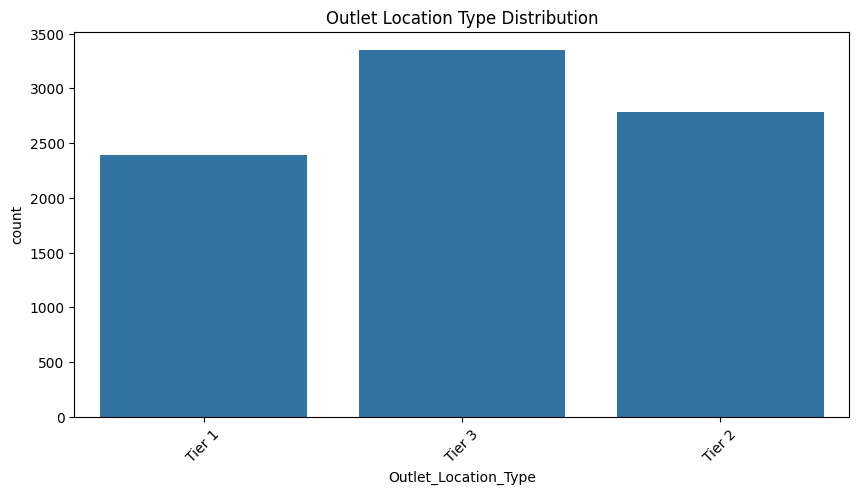

In [ ]:
fig , ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(data = df_sales , x = 'Outlet_Location_Type')
ax.set_title('Outlet Location Type Distribution')
ax.tick_params(axis='x', labelrotation=45)

In [ ]:
loc_filter = df_sales.groupby('Outlet_Location_Type')['Outlet_Identifier'].value_counts()
loc_filter

Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT046               930
                      OUT049               930
                      OUT019               528
Tier 2                OUT035               930
                      OUT045               929
                      OUT017               926
Tier 3                OUT027               935
                      OUT013               932
                      OUT018               928
                      OUT010               555
Name: count, dtype: int64

`we have 3 location Types  :            
- 3 outlits  are Tier 1  loc_type : OUT046	, OUT049 , OUT019
- 3 outlits  are Tier 2  loc_type : OUT035 , OUT045 , OUT017
- 4 outlits  are Tier 2  loc_type : OUT027 , OUT013 , OUT018	, OUT010

`

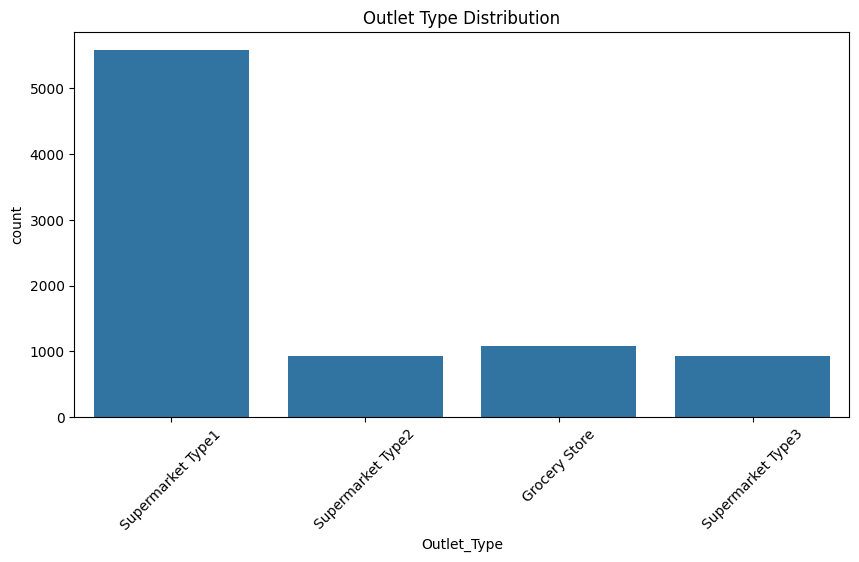

In [ ]:
fig , ax = plt.subplots(figsize = (10,5))
ax= sns.countplot(data = df_sales , x= 'Outlet_Type')
ax.set_title('Outlet Type Distribution')
ax.tick_params(axis='x', labelrotation=45)

In [ ]:
outlit_type_filter = df_sales.groupby('Outlet_Type')['Outlet_Identifier'].value_counts()
outlit_type_filter


Outlet_Type        Outlet_Identifier
Grocery Store      OUT010               555
                   OUT019               528
Supermarket Type1  OUT013               932
                   OUT035               930
                   OUT046               930
                   OUT049               930
                   OUT045               929
                   OUT017               926
Supermarket Type2  OUT018               928
Supermarket Type3  OUT027               935
Name: count, dtype: int64

 ` most of the outlits are of Supermarket Type 1 `

#### Numeric feature visualizations:

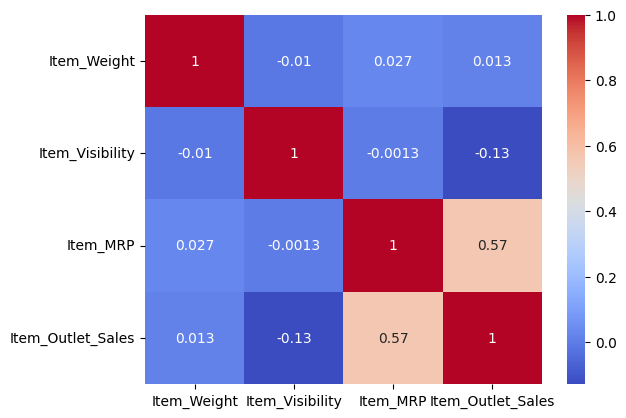

In [ ]:
## finding the correlation :
corr = df_sales.corr(numeric_only=True)
ax = sns.heatmap(corr,cmap='coolwarm' , annot=True)

`heatmap shows the  correlation coefficients between the numeric columns in general  Item MRP and Item outlet_sales have a moderate correlation coefficient , the rest of columns are uncorrelated since the correlation coefficient is almost 0 `

Text(0.5, 1.0, 'Item MRP vs Item Outlet Sales')

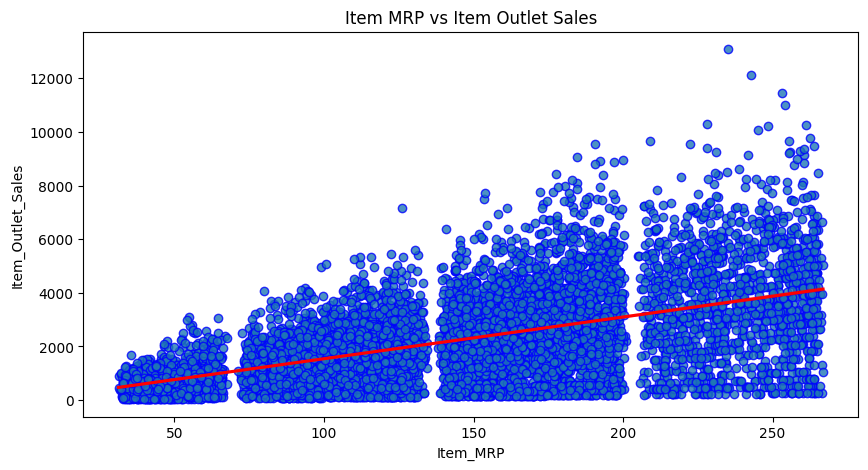

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
line_kws = dict(color='red')
scatter_kws = dict(edgecolor='blue')

sns.regplot(data=df_sales, x='Item_MRP', y='Item_Outlet_Sales',
            line_kws=line_kws, scatter_kws=scatter_kws, ax=ax)
ax.set_title('Item MRP vs Item Outlet Sales')

`the plot indicates a positive linear relationship between the two features (Item MRP,Item Outlet Sales)`



In [ ]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [ ]:
# starting with Item_Weight
df_sales['Item_Weight'].describe()

,Item_Weight
count,8523.000000
mean,12.868908
std,4.654721
min,-1.000000
25%,8.785000
50%,12.600000
75%,16.850000
max,21.350000


 ** **

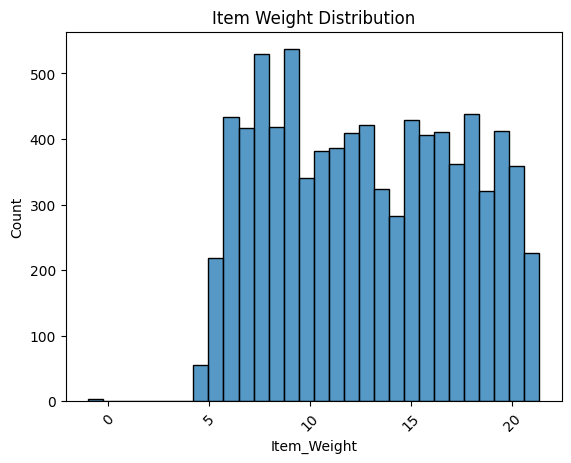

In [ ]:
## check it
ax = sns.histplot(data = df_sales , x = 'Item_Weight',bins = 30 )
ax.set_title('Item Weight Distribution')
ax.ticklabel_format(style='plain', axis='x')
ax.tick_params(axis='x', labelrotation=45)

Text(0.5, 1.0, 'Item Weight Distribution')

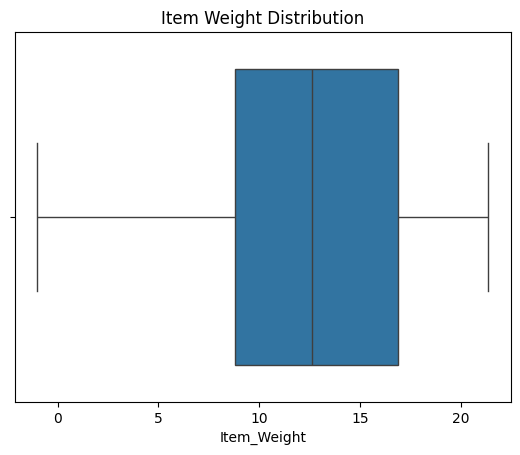

In [ ]:
ax = sns.boxplot(data = df_sales , x = 'Item_Weight')
ax.set_title('Item Weight Distribution')


****

`Since median line is near the center of the box , it indicates a relatively symmetrical distribution which meets what the histogram above shown`


In [ ]:
df_sales['Item_Visibility'].describe()

,Item_Visibility
count,8523.000000
mean,0.066132
std,0.051598
min,0.000000
25%,0.026989
50%,0.053931
75%,0.094585
max,0.328391


 **this column has a high standard deviation **

Text(0.5, 1.0, 'Item_Visibility Distribution')

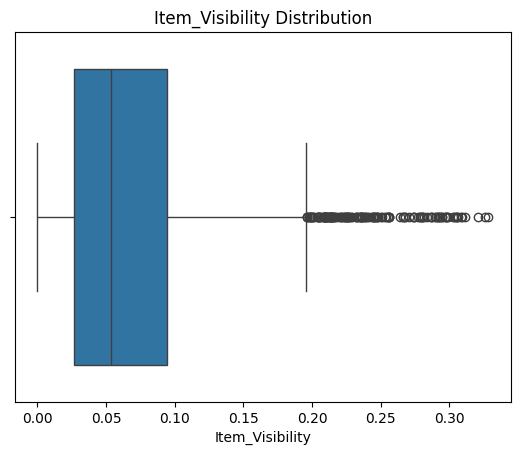

In [ ]:
ax = sns.boxplot(data = df_sales , x = 'Item_Visibility')
ax.set_title('Item_Visibility Distribution')


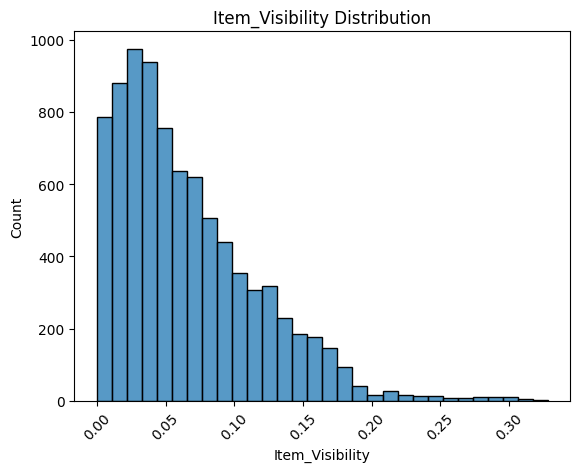

In [ ]:

ax = sns.histplot(data = df_sales , x = 'Item_Visibility',bins = 30 )
ax.set_title('Item_Visibility Distribution')
ax.ticklabel_format(style='plain', axis='x')
ax.tick_params(axis='x', labelrotation=45)

both of visualization indicates that the data is skewed (right_skewness)

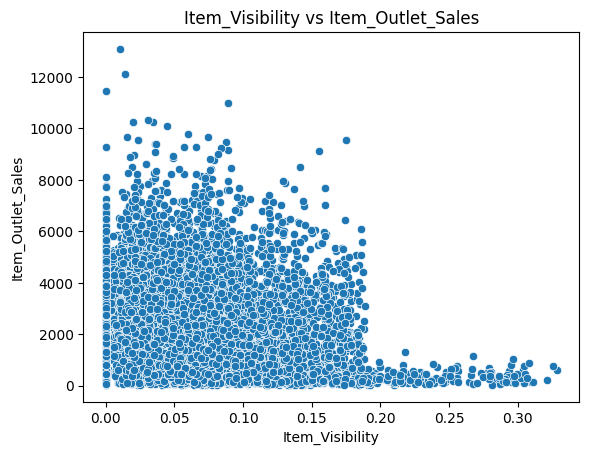

In [ ]:
## studying the relationship between Item visibility and sales
ax = sns.scatterplot(data = df_sales , x = 'Item_Visibility' , y = 'Item_Outlet_Sales')
ax.set_title('Item_Visibility vs Item_Outlet_Sales');

`no relationship at all `

In [ ]:
df_sales['Item_MRP'].describe()

,Item_MRP
count,8523.000000
mean,140.992782
std,62.275067
min,31.290000
25%,93.826500
50%,143.012800
75%,185.643700
max,266.888400


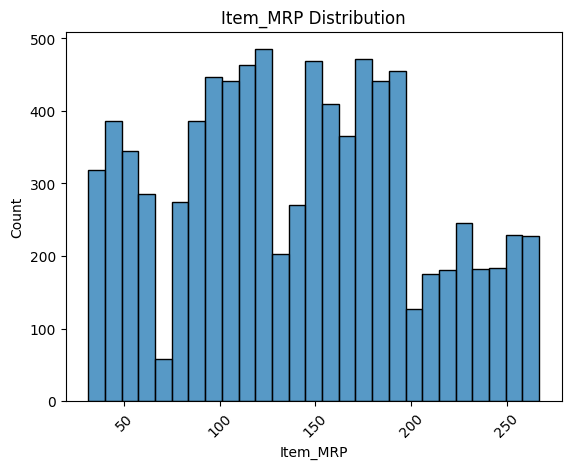

In [ ]:
ax = sns.histplot(data = df_sales , x = 'Item_MRP' )
ax.set_title('Item_MRP Distribution')
ax.ticklabel_format(style='plain', axis='x')
ax.tick_params(axis='x', labelrotation=45)

Text(0.5, 1.0, 'Item_MRP Distribution')

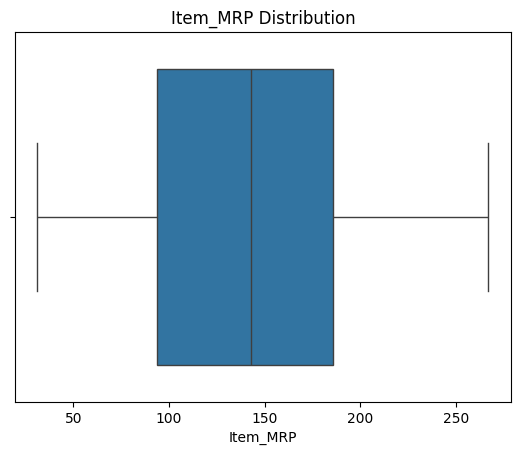

In [ ]:
ax = sns.boxplot(data = df_sales , x = 'Item_MRP')
ax.set_title('Item_MRP Distribution')


`the Item_MRP records  are  almost symmetric : mean and median are close ,50% of the data lies between (93.826500,185.643700) `


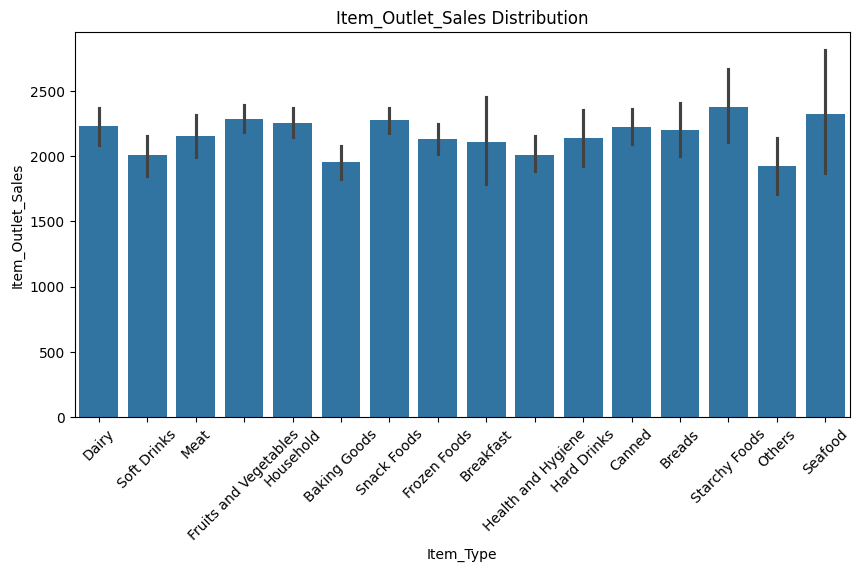

In [ ]:
# find the most saled category
fig , ax = plt.subplots(figsize = (10,5))
ax= sns.barplot(data = df_sales , x= 'Item_Type', y= 'Item_Outlet_Sales' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)



`as a measure of a thumb sales are almost the same for all item types `


In [ ]:
df_sales.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               935
                           OUT019               528
1987                       OUT013               932
1997                       OUT046               930
1998                       OUT010               555
1999                       OUT049               930
2002                       OUT045               929
2004                       OUT035               930
2007                       OUT017               926
2009                       OUT018               928
Name: count, dtype: int64

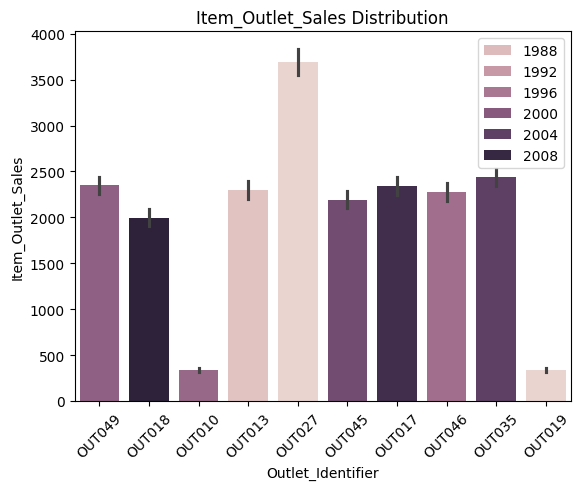

In [ ]:
## check the relationship of establishment year of the stores with the sales
ax = sns.barplot(data = df_sales , x= 'Outlet_Identifier', y= 'Item_Outlet_Sales', hue= 'Outlet_Establishment_Year' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)
ax.legend(loc = 'upper right');


` eventhough the best sales(highest sales) refers to the oldest store by construction year , the other stores despite varying construction years, have relatively similar sales (Outlet_Establishment_Year is not a factor)`

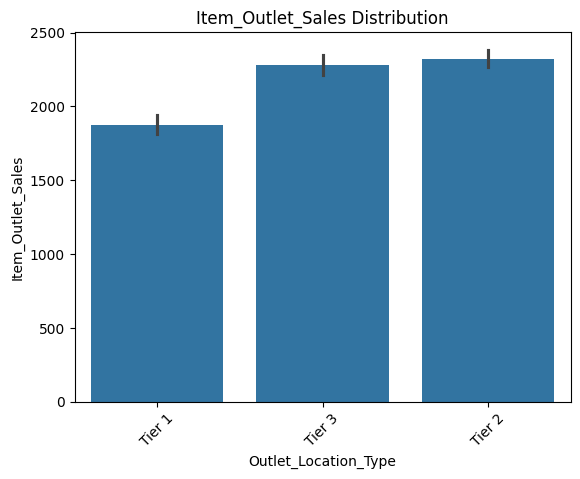

In [ ]:
#visualize the outlit location with sales
ax = sns.barplot(data = df_sales , x= 'Outlet_Location_Type', y= 'Item_Outlet_Sales' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

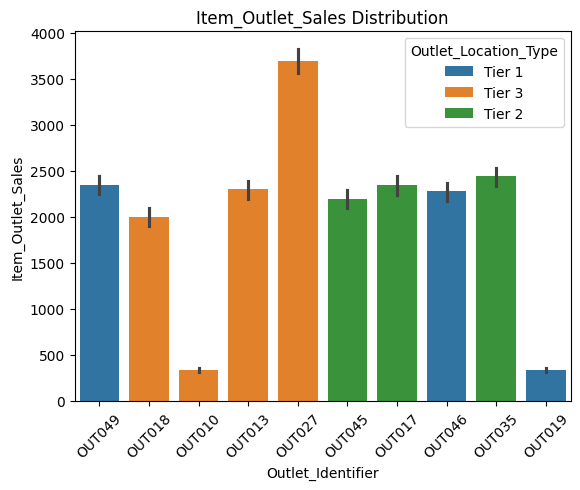

In [ ]:
#visualize the outlit location sales colored by outlit location
ax = sns.barplot(data = df_sales , x='Outlet_Identifier' ,y= 'Item_Outlet_Sales',  hue = 'Outlet_Location_Type' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

`- out027 and out019 have been established at the same year 1985 but they have different loc types (loc type may be a factor)`


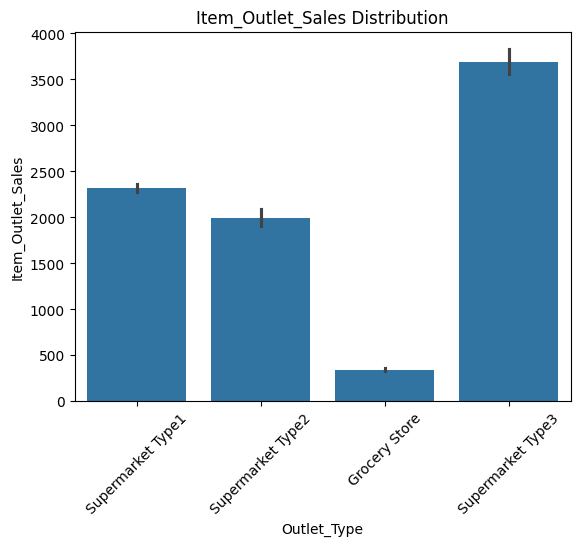

In [ ]:
## plot outlit type vs sales
ax = sns.barplot(data = df_sales , x= 'Outlet_Type', y= 'Item_Outlet_Sales' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

`super markets of type 3 has the best  sales `


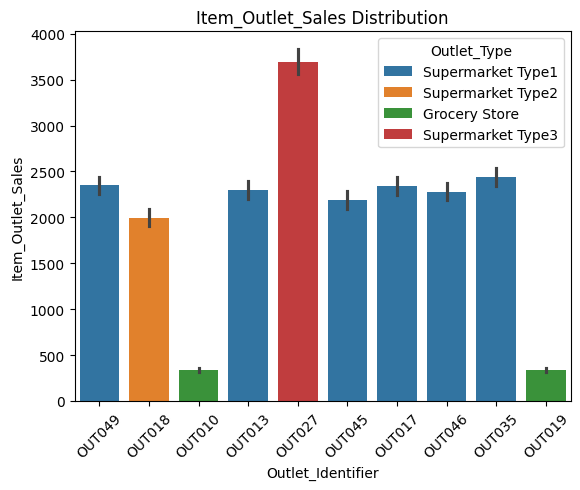

In [ ]:
ax = sns.barplot(data = df_sales , x='Outlet_Identifier' ,y= 'Item_Outlet_Sales',  hue = 'Outlet_Type' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

`grocery outlits have the minimum sales,supermarkets of type 1 and 2 have almost the same average of sales ,we conclude Outlet_Type affects the 'Item_Outlet_Sales' the most  `


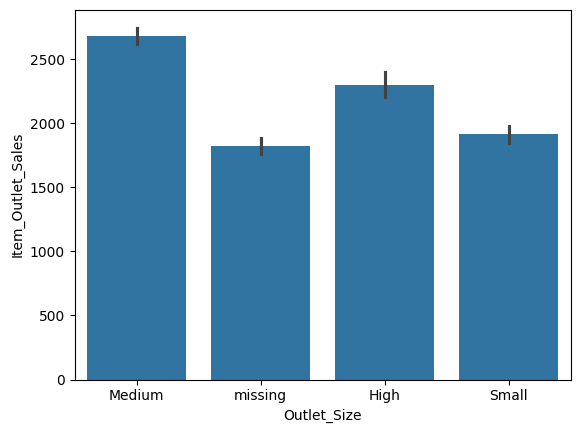

In [ ]:
fig , ax = plt.subplots()
ax = sns.barplot(data = df_sales , x = 'Outlet_Size', y = 'Item_Outlet_Sales')

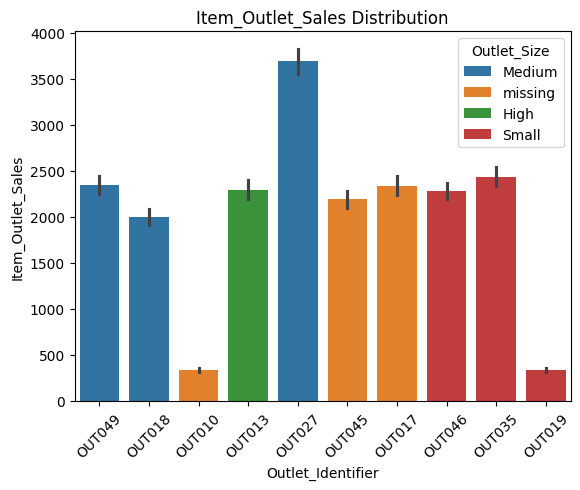

In [ ]:
# think about it
ax = sns.barplot(data = df_sales , x='Outlet_Identifier' ,y= 'Item_Outlet_Sales',  hue = 'Outlet_Size' )
ax.set_title('Item_Outlet_Sales Distribution')
ax.tick_params(axis='x', labelrotation=45)

`the percentage of missing values is large so we need to figue them out before we come with cocnlusions about the relationship between the outlet size and sales

## Feature Inspection


***For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning***

### Dictionary
 - Variable Name :	Description
 - Item_Identifier   :	Product ID
 - Item_Weight	     : Weight of product
 - Item_Fat_Content  :	Whether the product is low-fat or regular
 - Item_Visibility	 : The percentage of total display area of all products in a store allocated to the particular product
 - Item_Type         :	The category to which the product belongs
 - Item_MRP	         : Maximum Retail Price (list price) of the product
 - Outlet_Identifier : 	Store ID
 - Outlet_Establishment_Year :	The year in which store was established
 - Outlet_Size	 : The size of the store in terms of ground area covered
 - Outlet_Location_Type :	The type of area in which the store is located
 - Outlet_Type :	Whether the outlet is a grocery store or some sort of supermarket
 - Item_Outlet_Sales :	Sales of the product in the particular store. This is the target variable to be predicted.

`Remove the placeholders you added previously and replace them with null values. `

In [ ]:
## replace the place holder values by  NaNs
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace('missing',np.nan)

df_sales['Item_Weight'] = df_sales['Item_Weight'].replace(-1, np.nan)

# Get the value counts, including NaN
value_counts = df_sales['Item_Weight'].value_counts(dropna=False)

print(value_counts)


Item_Weight
12.150    103
17.600    101
13.650     89
11.800     86
15.100     86
         ... 
9.300       1
6.985       1
6.465       1
6.635       1
7.470       1
Name: count, Length: 484, dtype: int64


In [ ]:
df_sales['Outlet_Size'].value_counts(dropna = False)

,count
Outlet_Size,
Medium,2793
NaN,2410
Small,2388
High,932


In [ ]:
nan_rows = df_sales[df_sales['Item_Weight'].isna()]
nan_rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


## Univariate EDA Functions


In [ ]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


## Multivariate EDA Functions

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

#### categorical columns visualization

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

<ipython-input-197-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


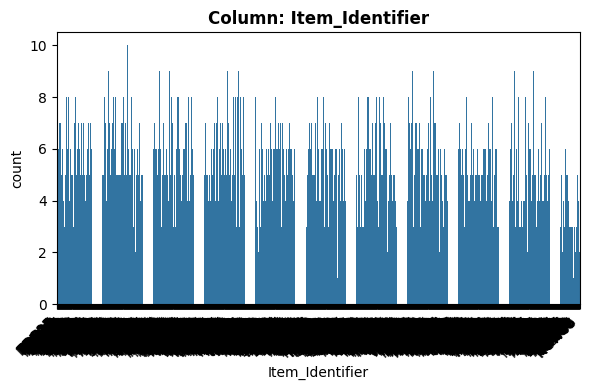

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.




<ipython-input-198-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

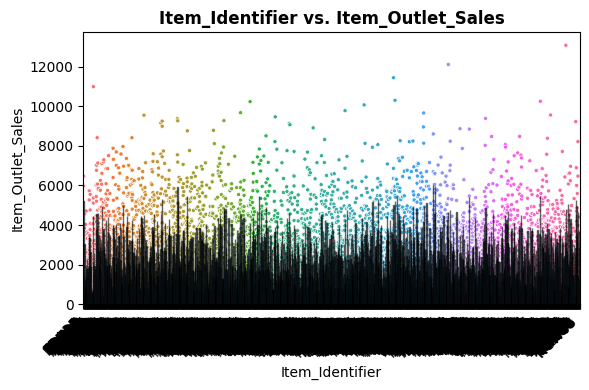

In [ ]:
x = 'Item_Identifier'
explore_categorical(df_sales, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None)
print('\n')
plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None)

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `nominal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `0 null values`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `very high = 1559  `
 - `This feature may be problematic for modeling due to high cardinality`

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `  we need to Drop it if it's just an identifier with no predictive value,it does not add value to the model for predicting sales `

In [ ]:
df_sales.drop(columns = 'Item_Identifier' , inplace = True)

<ipython-input-197-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


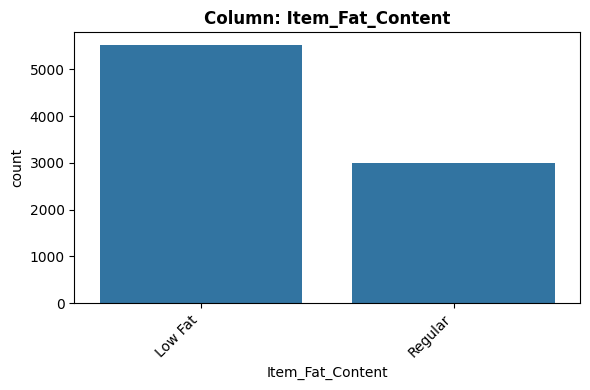

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.




<ipython-input-198-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

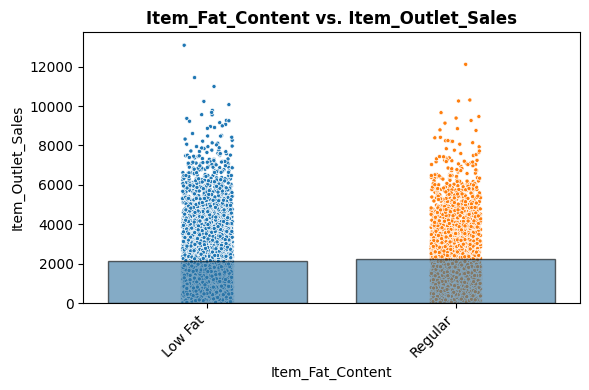

In [ ]:

x = 'Item_Fat_Content'
explore_categorical(df_sales, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None)
print('\n')
plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None)

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `nominal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `0 null values`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `low cardinality only 2 categories `

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `No`

<ipython-input-197-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


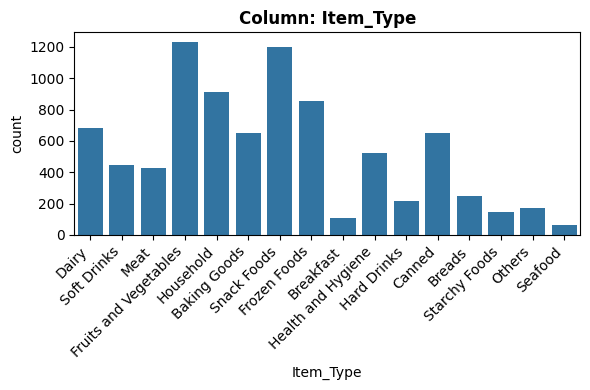

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.




<ipython-input-198-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

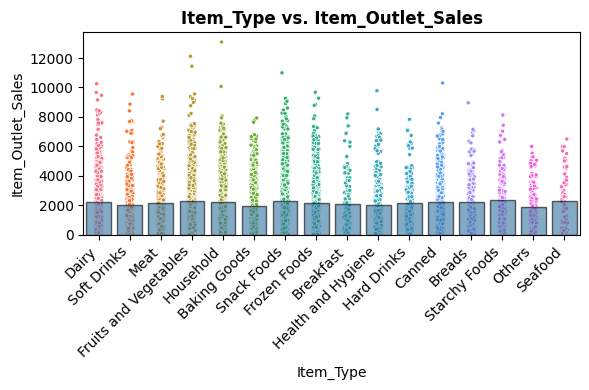

In [ ]:

x = 'Item_Type'
explore_categorical(df_sales, x)
print('\n')
plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales')


- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `nominal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `0 null values`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `16 , High cardinality `
 -` we need to drop this feature`

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `The plot of Item_Type versus Item_Outlet_Sales reveals that the average sales across different item types are similar. Additionally, the sales distribution within each type shows a consistent pattern, indicating that Item_Type does not significantly impact sales.`

In [ ]:
df_sales.drop(columns = 'Item_Type' , inplace = True)


<ipython-input-197-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


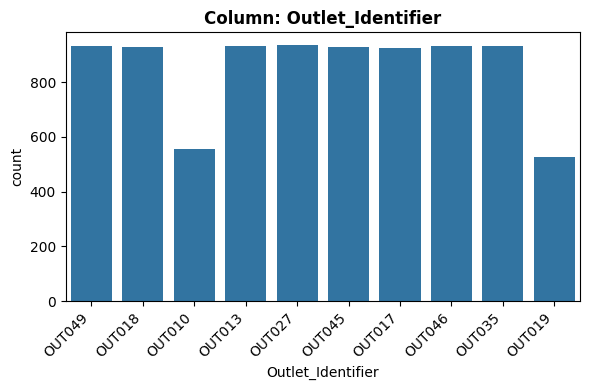

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.




<ipython-input-198-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

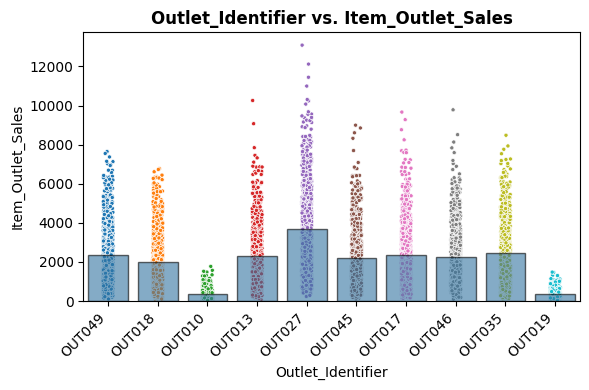

In [ ]:
x = 'Outlet_Identifier'
explore_categorical(df_sales, x)
print('\n')
plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales')



- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `nominal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `0 null values`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `10 it is not high `

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `No`

<ipython-input-197-dd9eff9c67b1>:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df[x] = temp_df[x].fillna(placeholder)
<ipython-input-197-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


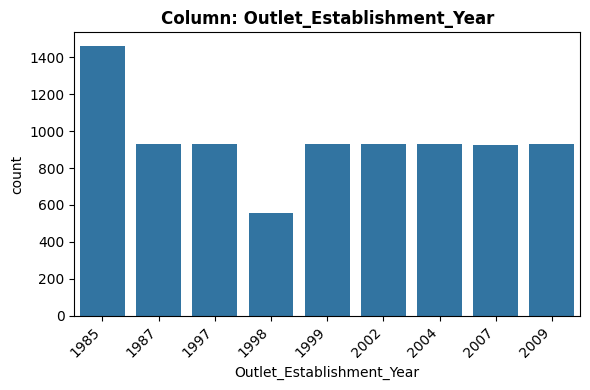

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.




<ipython-input-198-d79904e48e9f>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df[x] = temp_df[x].fillna(placeholder)
<ipython-input-198-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

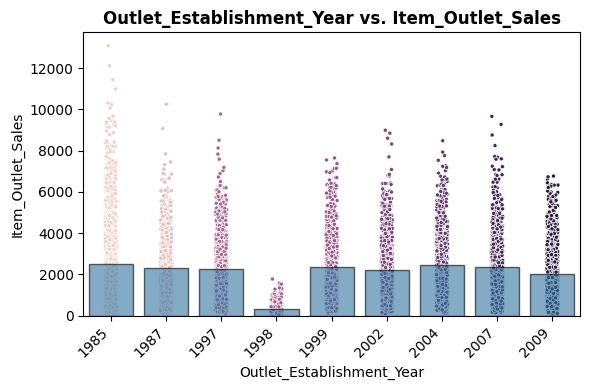

In [ ]:
x = 'Outlet_Establishment_Year'
explore_categorical(df_sales, x)
print('\n')
plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales')




- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `nominal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `0 null values`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `9 it is not high `

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `No`

<ipython-input-197-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


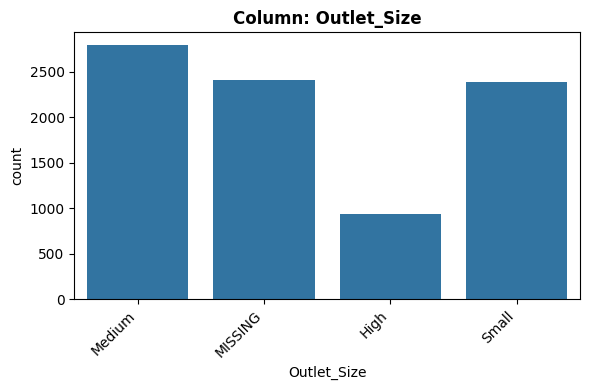

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.




<ipython-input-198-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

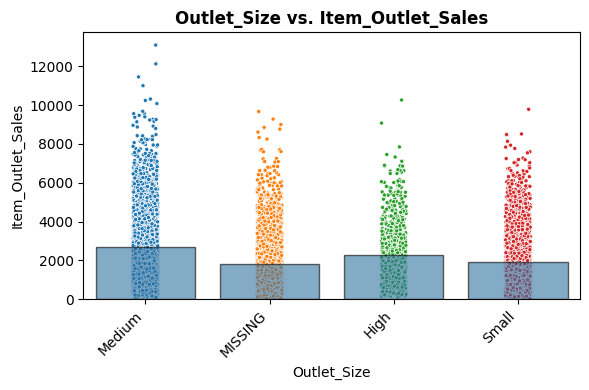

In [ ]:
x = 'Outlet_Size'
explore_categorical(df_sales, x)
print('\n')
plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales')

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `ordinal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `NaN's Found: 2410 (28.28%)`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `4(including missing) it is not high `

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `No`

<ipython-input-197-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


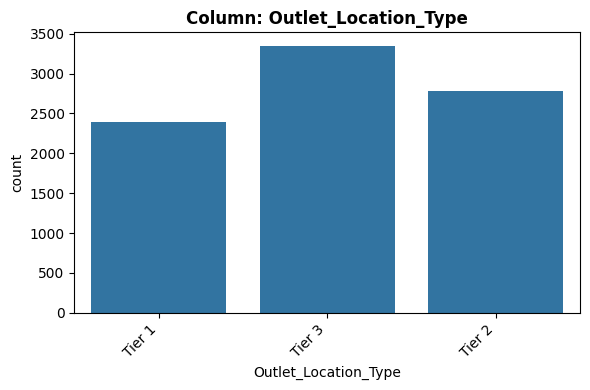

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.




<ipython-input-198-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

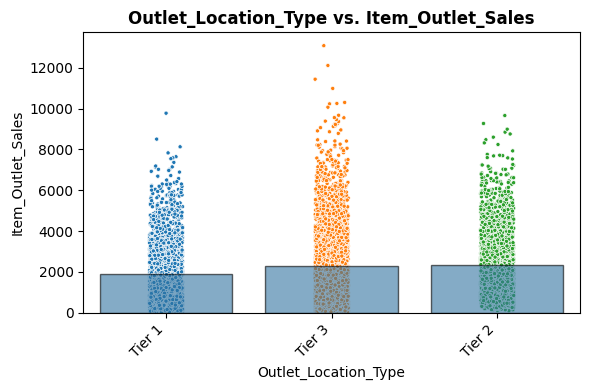

In [ ]:
x = 'Outlet_Location_Type'
explore_categorical(df_sales, x)
print('\n')
plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales')

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `nominal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `0 null values`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `3 it is not high `

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `No`

<ipython-input-197-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


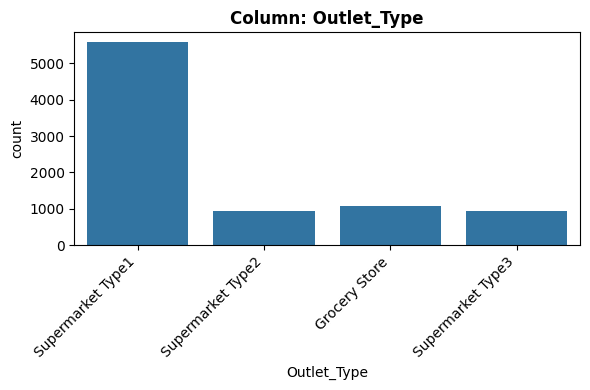

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.




<ipython-input-198-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

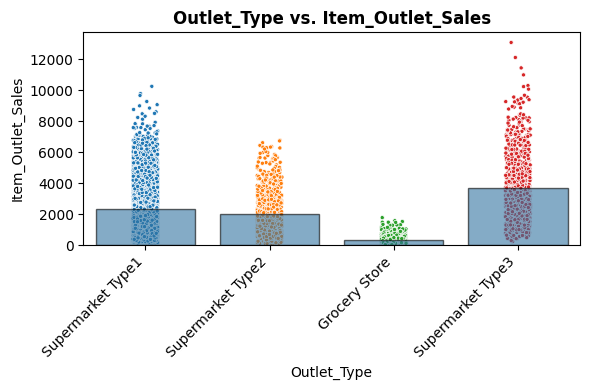

In [ ]:
x = 'Outlet_Type'
explore_categorical(df_sales, x)
print('\n')
plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales')

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `nominal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `0 null values`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `4 it is not high `

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `No`

#### numeric columns visualization

In [ ]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

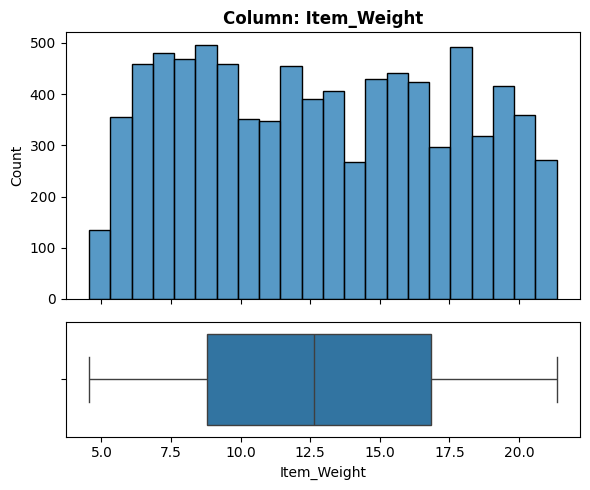

- NaN's Found: 4 (0.05%)
- Unique Values: 483
- Most common value: '12.15' occurs 103 times (1.21%)
- Not constant or quasi-constant.


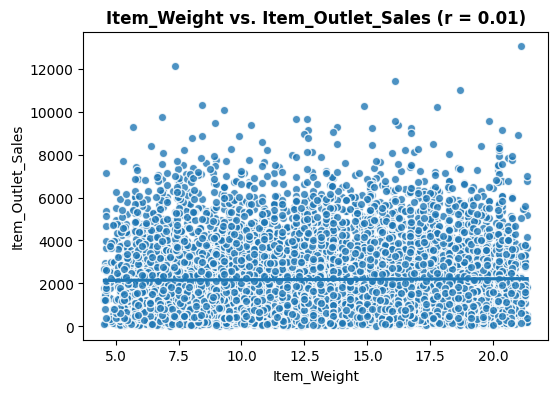

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [ ]:
x='Item_Weight'
explore_numeric(df_sales, x, figsize=(6,5) )
plot_numeric_vs_target(df_sales, x, y='Item_Outlet_Sales',
                           figsize=(6,4))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `numeric`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `NaN's Found: 4 (0.05%) , drop the columns`

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant`

- What is the cardinality? Is it high (>10)?
 - `not valid (numeric column) `

- Would we know this feature before the target is determined?
 - `maybe`

- Is there a business case/understanding reason to exclude based on our business case?
- ` The scatter plot and correlation coefficient of r=0.01 indicate that Item_Weight has no significant impact on Item_Outlet_Sales. Given this and the low percentage of missing values (0.05%), dropping the rows with missing weights is the most appropriate course of action. `

In [ ]:
df_sales.dropna(subset=['Item_Weight'], inplace=True)

In [ ]:
df_sales.isna().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


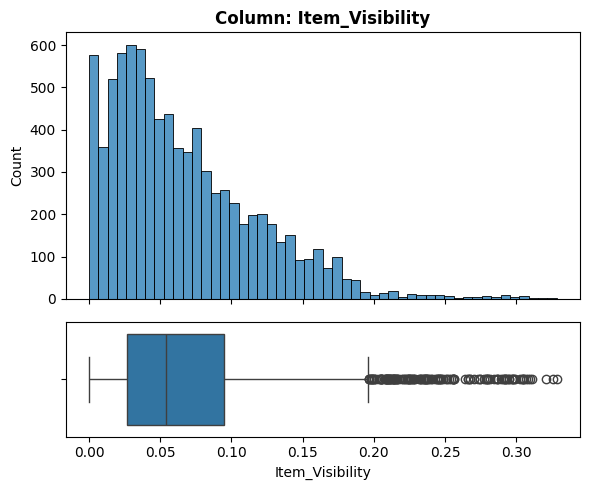

- NaN's Found: 0 (0.0%)
- Unique Values: 7876
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


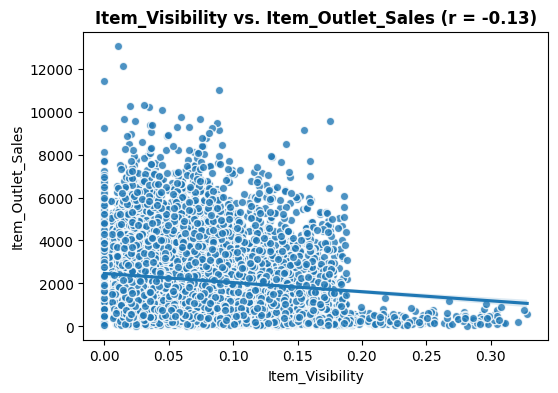

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [ ]:
x='Item_Visibility'
explore_numeric(df_sales, x, figsize=(6,5) )
plot_numeric_vs_target(df_sales, x, y='Item_Outlet_Sales',
                           figsize=(6,4))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `numeric`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `no nulls `

- Is the feature constant or quasi-constant?
 - `Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `not valid (numeric_column) `

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `No`

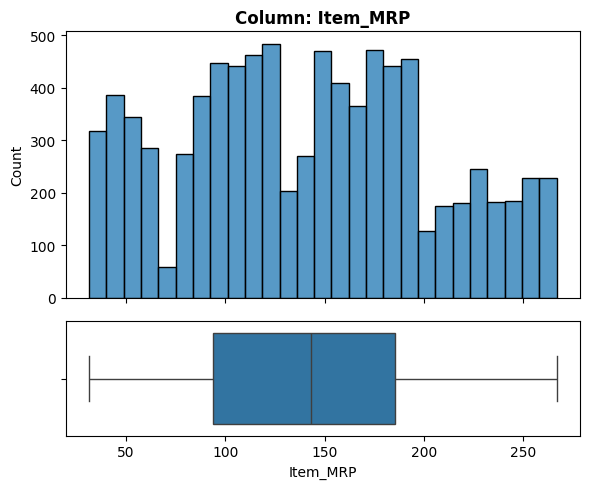

- NaN's Found: 0 (0.0%)
- Unique Values: 5936
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


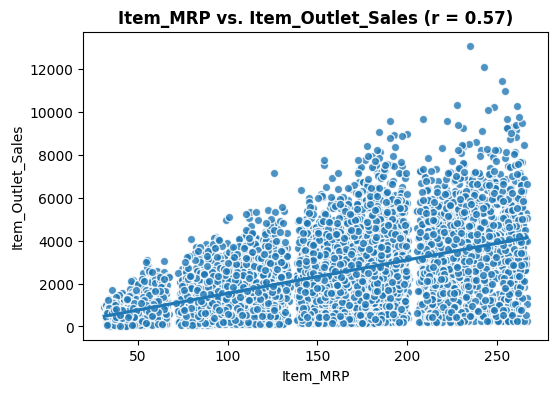

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [ ]:
x='Item_MRP'
explore_numeric(df_sales, x, figsize=(6,5) )
plot_numeric_vs_target(df_sales, x, y='Item_Outlet_Sales',
                           figsize=(6,4))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)

 - `numeric`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - `0 nulls`

- Is the feature constant or quasi-constant?
 - ` Not constant or quasi-constant.`

- What is the cardinality? Is it high (>10)?
 - `unvalid(numeric_column) `

- Would we know this feature before the target is determined?
 - `Yes`

- Is there a business case/understanding reason to exclude based on our business case?
- `No`

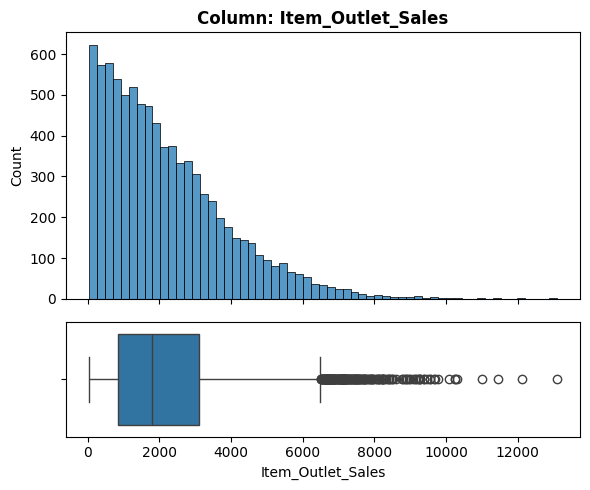

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Outlet_Sales'}, xlabel='Item_Outlet_Sales', ylabel='Count'>,
        <Axes: xlabel='Item_Outlet_Sales'>], dtype=object))

In [ ]:
##tagret column
x='Item_Outlet_Sales'
explore_numeric(df_sales, x, figsize=(6,5) )




1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `numeric. our target`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `0`

3. Is the feature constant or quasi-constant?
  -` Not a feature`

4. What is the cardinality? Is it high?
  -` N/A - numeric.`

5. Would we know this BEFORE the target is determined?
  - `Yes, since it IS our target`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `Yes, its our target`



## Preprocesing for Machine Learning

### Imports

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### Reloding the data




In [ ]:
df_sales_2 = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv')
df_sales_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Performing Preprocessing Steps

In [ ]:
# drop Item_Identifier due to its high cardinality
df_sales_2.drop(columns = 'Item_Identifier' , inplace = True)
df_sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
# modify Outlet_Establishment_Year column datatype
df_sales_2['Outlet_Establishment_Year'] = df_sales_2['Outlet_Establishment_Year'].astype(str)
df_sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   object 
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


In [ ]:
#  Checking for Duplicates
df_sales_2.duplicated().sum()

0

In [ ]:
# Checking missing values
df_sales_2.isna().sum()

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
# checking for inconsistencies in categorical columns
cat_cols = df_sales_2.select_dtypes(include='object').columns
print(cat_cols)
df_sales_2[cat_cols].nunique()

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


,0
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [ ]:
for col in cat_cols:
  print(f"{col}:")
  print(df_sales_2[col].value_counts())
  print("\n")

Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier:
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


Outlet_Establishment_Year:
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002 

In [ ]:
df_sales_2['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
# replace inconsistences in Item_Fat_Content column
df_sales_2['Item_Fat_Content'] = df_sales_2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df_sales_2['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
# fixing any immpossible values in numeric columns
num_cols = df_sales_2.select_dtypes(include='number').columns
df_sales_2[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [ ]:
# inspect the row with Item_Outlet_Sales = 13086.964800
df_sales_2[df_sales_2['Item_Outlet_Sales'] == 13086.964800]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


Household objects are more expensive usually than other items , no need to handle this value

### Defining X and y

In [ ]:
## Define X and y
X = df_sales_2.drop(columns='Item_Outlet_Sales').copy()
y = df_sales_2['Item_Outlet_Sales'].copy()
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
_# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


### Making a Preprocessing Pipeline

In [ ]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   object 
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), object(7)
memory usage: 549.3+ KB


In [ ]:
X_train['Item_Fat_Content'].value_counts().index.tolist()

['Low Fat', 'Regular']

In [ ]:
X_train['Outlet_Establishment_Year'].value_counts().index.tolist()

['1985', '2004', '2009', '2002', '2007', '1997', '1987', '1999', '1998']

In [ ]:
X_train['Outlet_Size'].value_counts().index.tolist()

['Medium', 'Small', 'High']

In [ ]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Item_Fat_Content','Outlet_Establishment_Year', 'Outlet_Size']
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
Fat_Content_order = ['Low Fat', 'Regular']
Establishment_Year_order = ['1985', '1987','1997','1998','1999','2002',
                            '2004','2007', '2009']
Size_ord =  ['NA','Small', 'Medium', 'High']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [Fat_Content_order,
                           Establishment_Year_order,
                           Size_ord]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Columns: ['Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Size']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                            ['1985', '1987', '1997', '1998',
                                             '1999', '2002', '2004', '2007',
                                             '2009'],
                                            ['NA', 'Small', 'Medium',
                                             'High']])),
                ('standardscaler', StandardScaler())])

In [ ]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                             ['1985', '1987', '1997', '1998',
                                              '1999', '2002', '2004', '2007',
                                              '2009'],
                                             ['NA', 'Small', 'Medium',
                                              'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Size'])

In [ ]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [ ]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [ ]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                  'Outlet_Establishment_Year', 'Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,-0.740321,1.533387,0.748125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.350766,1.533387,0.748125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,1.350766,0.072725,0.748125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,-0.740321,0.803056,-0.264370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,-0.740321,0.437890,-1.276865,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Modeling


In [ ]:
# custom Evaluation functions for returning model evaluation metrics


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor # NEW
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

### Linear Reggresion Model

In [ ]:
#import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
#instantiate the model
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [ ]:
# Fit the model on the training data
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
# Get predictions for the training data
y_predictions_train = lin_reg.predict(X_train_processed)
# Get predictions for the testing data
y_predictions_test = lin_reg.predict(X_test_processed)

In [ ]:
# Test function by saving results as a datframe
results_df = evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test,
                              output_frame=True)
results_df

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.088
- MSE = 1,297,564.415
- RMSE = 1,139.107
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.038
- MSE = 1,194,205.391
- RMSE = 1,092.797
- R^2 = 0.567


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MAE,MSE,RMSE,R^2
Training Data,847.088,1297564.415,1139.107,0.562
Test Data,804.038,1194205.391,1092.797,0.567


According to (R^2) values for the traing and testing data  this model is underfit where the models fails to make
predictions in both training and testing Data

## Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor # NEW

In [ ]:
 #Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(col_transformer, rf)

In [ ]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  (...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 295.952
- MSE = 182,505.690
- RMSE = 427.207
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 768.011
- MSE = 1,221,617.583
- RMSE = 1,105.268
- R^2 = 0.557


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The model is overfitting, as evidenced by its strong performance on the training data (R² = 0.938) compared to poor performance on the test data (R² = 0.557). This discrepancy suggests the model fails to generalize well to unseen data.

### Model Comparison: Test Performance

#### Regression Model (Test Data):
- **MAE**: 768.011
- **MSE**: 1,221,617.583
- **RMSE**: 1,105.268
- **R²**: 0.557

#### Random Forest Model (Test Data):
- **MAE**: 804.038
- **MSE**: 1,194,205.391
- **RMSE**: 1,092.797
- **R²**: 0.567

### Comparison:
- **MAE**: The Regression Model model is better (768.011 vs. 804.038).
- **MSE**: The Regression Model model also performs better (1,221,617.583 vs. 1,194,205.391).
- **RMSE**: Random Forest model is slightly better (1,105.268 vs. 1,092.797).
- **R²**: The Random Forest  model explains more variance (0.567 vs. 0.557).

### Conclusion:
The **Regression model** has better MAE and MSE scores, while the **Random Forest model** performs slightly better in RMSE and explains a bit more variance. Overall, the Regression model has the best test scores.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [ ]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value=...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [ ]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__oob_score': True}

In [ ]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 653.614
- MSE = 868,871.381
- RMSE = 932.133
- R^2 = 0.706

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 734.612
- MSE = 1,119,009.541
- RMSE = 1,057.832
- R^2 = 0.594


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Foorest model still overfitting the data even after the tuning parameters